### Домашнее задание №2  «Функции потерь и оптимизация»

1. Загрузите данные. Используйте датасет с ирисами. Его можно загрузить непосредственно из библиотеки Sklearn. В данных оставьте только 2 класса: Iris Versicolor, Iris Virginica.  
2. Самостоятельно реализуйте логистическую регрессию, без использования метода LogisticRegression из библиотеки. Можете использовать библиотеки pandas, numpy, math для реализации. Оформите в виде функции. \*Оформите в виде класса с методами.
3. Реализуйте метод градиентного спуска. Обучите логистическую регрессию этим методом. Выберете и посчитайте метрику качества. Метрика должна быть одинакова для всех пунктов домашнего задания. Для упрощения сравнения выберете только одну метрику.
4. Повторите п. 3 для метода скользящего среднего (Root Mean Square Propagation, RMSProp).
5. Повторите п. 3 для ускоренного по Нестерову метода адаптивной оценки моментов (Nesterov–accelerated Adaptive Moment Estimation, Nadam).
6. Сравните значение метрик для реализованных методов оптимизации. Можно оформить в виде таблицы вида |метод|метрика|время работы| (время работы опционально). Напишите вывод.

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from random import sample, seed

In [2]:
data = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/\
6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')

### 1. Предобработка данных

In [3]:
data = data.loc[data['variety'] != 'Setosa']

In [4]:
display(data.head())
display(data.shape)

,sepal.length,sepal.width,petal.length,petal.width,variety
50,7.0,3.2,4.7,1.4,Versicolor
51,6.4,3.2,4.5,1.5,Versicolor
52,6.9,3.1,4.9,1.5,Versicolor
53,5.5,2.3,4.0,1.3,Versicolor
54,6.5,2.8,4.6,1.5,Versicolor


(100, 5)

In [5]:
data['variety'] = data['variety'].map({'Versicolor': 0, 'Virginica': 1})
y = np.array(data['variety'])
X = np.array(data.drop(['variety'], axis = 1))

In [6]:
EPOCHS = 1000
LEARNING_RATE = 0.01

__Сигмоида__. 

$${\displaystyle \sigma (x)={\frac {1}{1+e^{-x}}}.}$$

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

__Бинарная кросс-энтропия__ _(Функция потерь)_.  

$$J = -\sum_{i=1}^{N} y_i\log (h_\theta(x_i)) + (1 - y_i)\log(1 - h_\theta(x_i))$$

In [8]:
def cost_function(y, y_pred):
    eps = 1e-6    
    err = - np.mean(y * np.log(y_pred + eps) + (1 - y + eps) * np.log(1 - y_pred + eps))
    err = np.sum(err)
    return err

Функции для 5 тет (4 для признаков + свободный член)

In [9]:
def der_theta0(X, y, theta0, theta1, theta2, theta3, theta4):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (sigmoid(theta0 + theta1*X[i,0] + theta2*X[i,1] + theta3*X[i,2] + theta4*X[i,3]) - y[i])
    return total_cost / (len(X)) 

In [10]:
def der_theta1(X, y, theta0, theta1, theta2, theta3, theta4):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (sigmoid(theta0 + theta1*X[i,0] + theta2*X[i,1] + theta3*X[i,2] + theta4*X[i,3]) - y[i]) * X[i,0]
    return total_cost / (len(X))

In [11]:
def der_theta2(X, y, theta0, theta1, theta2, theta3, theta4):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (sigmoid(theta0 + theta1*X[i,0] + theta2*X[i,1] + theta3*X[i,2] + theta4*X[i,3]) - y[i]) * X[i,1]
    return total_cost / (len(X))

In [12]:
def der_theta3(X, y, theta0, theta1, theta2, theta3, theta4):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (sigmoid(theta0 + theta1*X[i,0] + theta2*X[i,1] + theta3*X[i,2] + theta4*X[i,3]) - y[i]) * X[i,2]
    return total_cost / (len(X))

In [13]:
def der_theta4(X, y, theta0, theta1, theta2, theta3, theta4):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (sigmoid(theta0 + theta1*X[i,0] + theta2*X[i,1] + theta3*X[i,2] + theta4*X[i,3]) - y[i]) * X[i,3]
    return total_cost / (len(X))

### Градиентный спуск

In [14]:
def train(X, y, lr = LEARNING_RATE, epochs = EPOCHS ):
    theta0, theta1, theta2, theta3, theta4 = 1, 1, 1, 1, 1
    costs = []
    for _ in range(epochs):
        dt0 = der_theta0(X, y, theta0, theta1, theta2, theta3, theta4)
        dt1 = der_theta1(X, y, theta0, theta1, theta2, theta3, theta4)
        dt2 = der_theta2(X, y, theta0, theta1, theta2, theta3, theta4)
        dt3 = der_theta3(X, y, theta0, theta1, theta2, theta3, theta4)
        dt4 = der_theta4(X, y, theta0, theta1, theta2, theta3, theta4)
    
        theta0 -= lr * dt0
        theta1 -= lr * dt1
        theta2 -= lr * dt2
        theta3 -= lr * dt3
        theta4 -= lr * dt4
        
        y_pred = sigmoid(theta0 + theta1*X[:,0] + theta2*X[:,1] + theta3*X[:,2] + theta4*X[:,3])
        cost = cost_function(y, y_pred)
        costs.append(cost)
        
    plt.plot(range(epochs), costs)
    plt.xlabel("Epoch")
    plt.ylabel("Cost")
    plt.title("Costs curve")
    return theta0, theta1, theta2, theta3, theta4

CPU times: user 992 ms, sys: 19.2 ms, total: 1.01 s
Wall time: 1 s


(0.44654888591269765,
 -0.993322083405769,
 -0.22329490809539176,
 0.8653913941715192,
 1.3732456566170808)

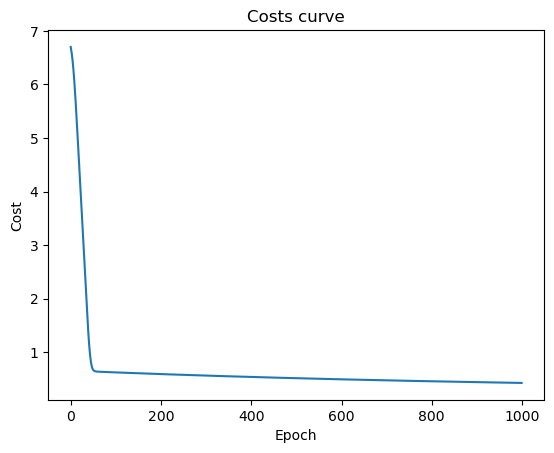

In [15]:
%%time
theta0, theta1, theta2, theta3, theta4 = train(X, y)
theta0, theta1, theta2, theta3, theta4

In [16]:
y_pred = sigmoid(theta0 + theta1*X[:,0] + theta2*X[:,1] + theta3*X[:,2] + theta4*X[:,3])
y_pred = [0 if y < 0.5 else 1 for y in y_pred]
accuracy_score(y, y_pred)

0.95

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('variety',axis=1).values, data['variety'].values, random_state=1, test_size=0.3)

In [18]:
def train_test_model(X_train, y_train, X_test, y_test, epochs=EPOCHS, lr=LEARNING_RATE):
    theta0, theta1, theta2, theta3, theta4 = 1, 1, 1, 1, 1
    costs_train = []
    costs_test = []
    for e in range(epochs):
        dt0 = der_theta0(X_train, y_train, theta0, theta1, theta2, theta3, theta4)
        dt1 = der_theta1(X_train, y_train, theta0, theta1, theta2, theta3, theta4)
        dt2 = der_theta2(X_train, y_train, theta0, theta1, theta2, theta3, theta4)
        dt3 = der_theta3(X_train, y_train, theta0, theta1, theta2, theta3, theta4)
        dt4 = der_theta4(X_train, y_train, theta0, theta1, theta2, theta3, theta4)

        theta0 -= lr * dt0
        theta1 -= lr * dt1
        theta2 -= lr * dt2
        theta3 -= lr * dt3
        theta4 -= lr * dt4
        
        y_pred_train = sigmoid(theta0 + theta1*X_train[:,0] + theta2*X_train[:,1] + theta3*X_train[:,2] + theta4*X_train[:,3])
        y_pred_test = sigmoid(theta0 + theta1*X_test[:,0] + theta2*X_test[:,1] + theta3*X_test[:,2] + theta4*X_test[:,3])
        
        cost_train = cost_function(y_train, y_pred_train)
        cost_test = cost_function(y_test, y_pred_test)
        
        costs_train.append(cost_train)
        costs_test.append(cost_test)
        
    plt.plot(range(epochs), costs_train)
    plt.scatter(range(epochs), costs_test, c='r')
    plt.xlabel("Epoch")
    plt.ylabel("Cost")
    plt.title("Costs curve")
    plt.legend(['train','test'])
    return theta0, theta1, theta2, theta3, theta4

CPU times: user 745 ms, sys: 19.9 ms, total: 765 ms
Wall time: 751 ms


(-0.8468905343159089,
 -2.5771674512240663,
 -2.018213576459201,
 3.3848328051213574,
 3.7370442243173714)

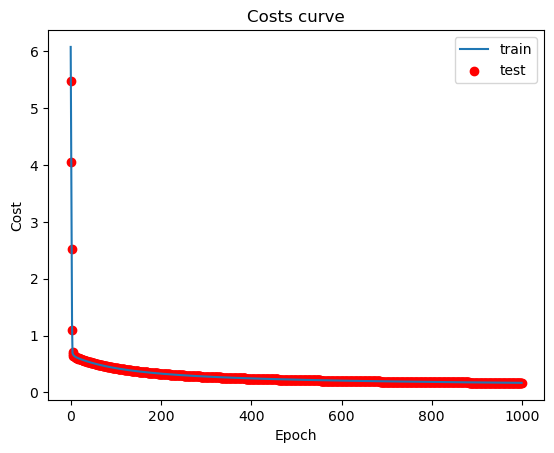

In [19]:
%%time
theta0, theta1, theta2, theta3, theta4 = train_test_model(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, lr=0.1)
theta0, theta1, theta2, theta3, theta4

In [20]:
y_pred = sigmoid(theta0 + theta1*X[:,0] + theta2*X[:,1] + theta3*X[:,2] + theta4*X[:,3])
y_pred = [0 if y < 0.5 else 1 for y in y_pred]
accuracy_score(y, y_pred)

0.96

### Nesterov–accelerated Adaptive Moment Estimation, Nadam

In [21]:
def train_model_NADAM(X, y, gamma=0.9, epochs=EPOCHS, lr=LEARNING_RATE):
    theta0, theta1, theta2, theta3, theta4 = 1, 1, 1, 1, 1
    v = np.zeros(5)
    costs = []
    for e in range(epochs):
        dt0 = der_theta0(X, y, theta0, theta1, theta2, theta3, theta4)
        dt1 = der_theta1(X, y, theta0, theta1, theta2, theta3, theta4)
        dt2 = der_theta2(X, y, theta0, theta1, theta2, theta3, theta4)
        dt3 = der_theta3(X, y, theta0, theta1, theta2, theta3, theta4)
        dt4 = der_theta4(X, y, theta0, theta1, theta2, theta3, theta4)

        v[0] = gamma * v[0] + lr*dt0
        v[1] = gamma * v[1] + lr*dt1
        v[2] = gamma * v[2] + lr*dt2
        v[3] = gamma * v[3] + lr*dt3
        v[4] = gamma * v[4] + lr*dt4
        
        theta0 -= v[0]
        theta1 -= v[1]
        theta2 -= v[2]
        theta3 -= v[3]
        theta4 -= v[4]
        
        y_pred = sigmoid(theta0 + theta1*X[:,0] + theta2*X[:,1] + theta3*X[:,2] + theta4*X[:,3])
        cost = cost_function(y, y_pred)        
        costs.append(cost)
        
    plt.plot(range(epochs), costs)
    plt.xlabel("Epoch")
    plt.ylabel("Cost")
    plt.title("Costs curve")
    return theta0, theta1, theta2, theta3, theta4

CPU times: user 978 ms, sys: 17.9 ms, total: 996 ms
Wall time: 984 ms


(-0.8119921955645982,
 -2.58183929922336,
 -2.0428899708179675,
 3.402770425763325,
 3.7197315210803445)

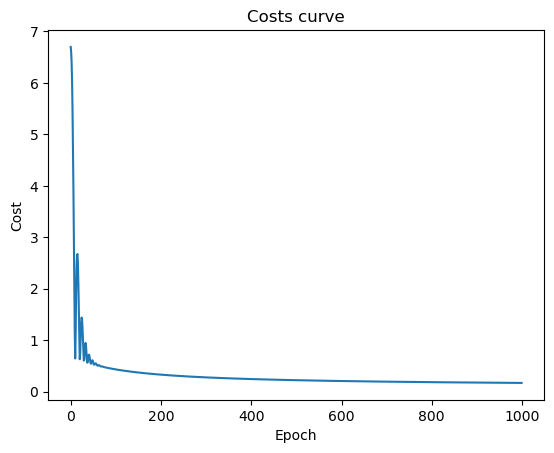

In [22]:
%%time
theta0, theta1, theta2, theta3, theta4 = train_model_NADAM(X, y)
theta0, theta1, theta2, theta3, theta4

In [23]:
y_pred = sigmoid(theta0 + theta1*X[:,0] + theta2*X[:,1] + theta3*X[:,2] + theta4*X[:,3])
y_pred = [0 if y < 0.5 else 1 for y in y_pred]
accuracy_score(y, y_pred)

0.96

### Root Mean Square Propagation, RMSProp

In [24]:
def train_model_RMSP(X, y, gamma=0.9, epochs=EPOCHS, lr=LEARNING_RATE):
    theta0, theta1, theta2, theta3, theta4 = 1, 1, 1, 1, 1
    eps=1e-5
    EG = np.zeros(5)
    costs = []
    for e in range(epochs):
        dt0 = der_theta0(X, y, theta0, theta1, theta2, theta3, theta4)
        dt1 = der_theta1(X, y, theta0, theta1, theta2, theta3, theta4)
        dt2 = der_theta2(X, y, theta0, theta1, theta2, theta3, theta4)
        dt3 = der_theta3(X, y, theta0, theta1, theta2, theta3, theta4)
        dt4 = der_theta4(X, y, theta0, theta1, theta2, theta3, theta4)

        EG[0] = gamma*EG[0] + (1-gamma)*(dt0**2)
        EG[1] = gamma*EG[1] + (1-gamma)*(dt1**2)
        EG[2] = gamma*EG[2] + (1-gamma)*(dt2**2)
        EG[3] = gamma*EG[3] + (1-gamma)*(dt3**2)
        EG[4] = gamma*EG[4] + (1-gamma)*(dt4**2)
        
        theta0 -= lr * dt0/np.sqrt(EG[0]+eps)
        theta1 -= lr * dt1/np.sqrt(EG[1]+eps)
        theta2 -= lr * dt2/np.sqrt(EG[2]+eps)
        theta3 -= lr * dt3/np.sqrt(EG[3]+eps)
        theta4 -= lr * dt4/np.sqrt(EG[4]+eps)
        
        y_pred = sigmoid(theta0 + theta1*X[:,0] + theta2*X[:,1] + theta3*X[:,2] + theta4*X[:,3])
        cost = cost_function(y, y_pred)
        costs.append(cost)
        
    plt.plot(range(epochs), costs)
    plt.xlabel("Epoch")
    plt.ylabel("Cost")
    plt.title("Costs curve")
    return theta0, theta1, theta2, theta3, theta4

CPU times: user 999 ms, sys: 19.8 ms, total: 1.02 s
Wall time: 1.01 s


(-6.10403629085351,
 -2.363323455282481,
 -3.3029412467687735,
 3.962574144462854,
 6.518198978767407)

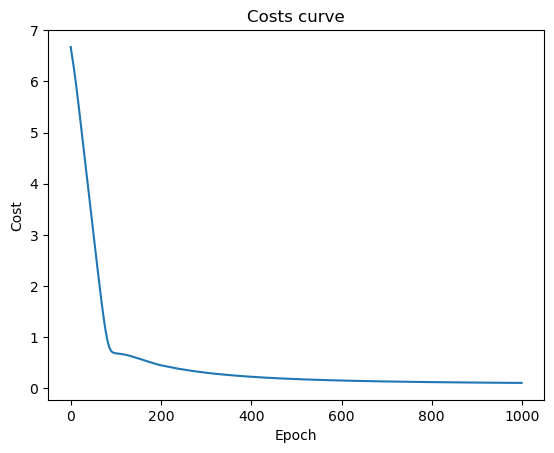

In [25]:
%%time
theta0, theta1, theta2, theta3, theta4 = train_model_RMSP(X, y)
theta0, theta1, theta2, theta3, theta4

In [26]:
y_pred = sigmoid(theta0 + theta1*X[:,0] + theta2*X[:,1] + theta3*X[:,2] + theta4*X[:,3])
y_pred = [0 if y < 0.5 else 1 for y in y_pred]
accuracy_score(y, y_pred)

0.97

Алгоритм | Accuracy | Время
------|:--------:|------:
Градиентный спуск     | 0.95     | 992 ms
Nadam     | 0.96     | 989 ms
RMSP     | 0.97  | 996 ms